# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 18__

__Nombres de los estudiantes: Hong Xiang Chen, Adrián Turiel Charro y Andrés Teruel Fernández__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

In [1]:
RANDOM_STATE=333

In [2]:
#Librerias
import pandas as pd

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [3]:
df = pd.read_csv('airbnb.csv') # Cargamos el conjuntos de datos
# df = df.dropna()             # eliminamos los pacientes con datos incompletos  # no lo pide
df.head()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0


* Comentarios: Este conjunto de datos representa los alojamientos y sus características, asi como el numero de habitaciones, la latitud, la longitud, sus precios por noche...

### Significado de las variables:

* accomodates: personas que pueden alojarse en el piso
* bathrooms: representa el numero de baños 
* bedrooms: representa el numero de dormitorios 
* guest_included: huespedes ajenos que ya viven en el piso
* host_listings_count: listado de anfitriones
* latitude: el grado de latitud donde se encuentra
* longitude: el grado de longitud donde se encuentra
* minimum_nights: mínimo número de noches que debes alojarte en el airbnb
* number_of_reviews: números de reseñas
* distance_centre: la distancia desde el alojamiento al centro
* instant_bookable: si puedes reservar en el momento o no
* entire_home: alojamiento de toda la casa
* private_room: variable que dice si tiene habitaciones privadas o no (0 o 1)
* shared_room: variable que dice si tiene habitaciones compartidas o no (0 o 1)
* price: el precio por noche

In [4]:
df.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,0.155954,0.777170,0.218562,0.004267,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,0.362824,0.416159,0.413285,0.065187,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,0.000000,1.000000,0.000000,0.000000,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,0.000000,1.000000,0.000000,0.000000,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,0.000000,1.000000,0.000000,0.000000,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,440.000000


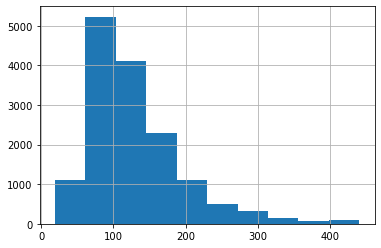

In [5]:
# Distribución de precios
df.price.hist()

* Comentario: como es de esperar todas los precios del alojamiento tienen un valor superior a 0. La media se concentra en los 130 dolares, siendo los más solicitados los alojamientos entre 90 y 100 dolares. A partir de los 250 dolares hay pocas ofertas de alojamiento debido a sus altos precio.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [6]:
correl = df.corr(method='pearson')
correl = correl[abs(correl['price']) >= 0.2]['price']
correl

accommodates       0.552183
bathrooms          0.283759
bedrooms           0.517237
guests_included    0.338739
distance_centre   -0.204698
entire_home        0.361313
private_room      -0.357184
price              1.000000
Name: price, dtype: float64

* Comentario: empezamos calculano el coeficiente de correlación de Pearson entre todas la varibles, y despues seleccionamos solo la columna de price, la que nos interesa, y concretamente mostramos auqllas cuyo valor es como minimo 0.2 en valor aboluto.

In [7]:
data = df[['accommodates', 'bathrooms', 'bedrooms','guests_included',
           'distance_centre','entire_home','private_room','price']].copy() 
data

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


* Comentario: creamos el dataframe con el nombre de las columnas obtenidas anteriormente

## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

* Comentario: Cuando trabajamos con redes neuronales no hace falta reescalar los datos, ya que las redes neuronales funcionan bien con los datos originales. Pero estaría bien reescalarlos porque nos facilita en el entrenamiento a converjer  más rápidamente.

In [8]:
# array que contiene sólo los datos de entrenamiento
desPisos = data.copy()
desPisos = data.drop(['price'], axis=1)
#print(dataX)

# array que contiene sólo las variables de salida
target = pd.DataFrame()
target['price'] = data['price'].copy()
#print(dataY)

In [9]:
target

,price
0,160.0
1,120.0
2,99.0
3,100.0
4,175.0
...,...
14993,140.0
14994,120.0
14995,120.0
14996,95.0


In [10]:
desPisos

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room
0,4,2.0,2.0,1,3.279483,1,0
1,4,1.0,2.0,2,5.951843,1,0
2,2,1.0,1.0,1,2.601055,1,0
3,2,1.0,1.0,1,1.095138,0,1
4,2,1.0,1.0,1,0.844491,1,0
...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0
14994,4,1.0,2.0,1,5.687407,1,0
14995,2,1.0,1.0,1,1.620395,1,0
14996,3,1.0,1.0,1,1.777881,1,0


In [11]:
# TODO Tiene pinta de que seria esto, pq es lo que utiliza el profe en el suyo, que es muy parecido PERO RAZONAR XD
# Que significan los negativos?

from sklearn.preprocessing import StandardScaler

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(desPisos)
desPisos_scaled=scaler_x.transform(desPisos)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
scaler_y.fit(target)
target_scaled=scaler_y.transform(target)

In [12]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler

# Transformamos las variables de entrada
scaler_x = MinMaxScaler()
scaler_x.fit(desPisos)
desPisos_scaled=scaler_x.transform(desPisos)

# Y también transformamos la variable de salida
scaler_y = MinMaxScaler()
scaler_y.fit(target)
target_scaled=scaler_y.transform(target)

In [13]:
desPisos_scaled

array([[0.1875    , 0.25      , 0.2       , ..., 0.26979228, 1.        ,
        0.        ],
       [0.1875    , 0.125     , 0.2       , ..., 0.49768568, 1.        ,
        0.        ],
       [0.0625    , 0.125     , 0.1       , ..., 0.2119373 , 1.        ,
        0.        ],
       ...,
       [0.0625    , 0.125     , 0.1       , ..., 0.12830863, 1.        ,
        0.        ],
       [0.125     , 0.125     , 0.1       , ..., 0.14173871, 1.        ,
        0.        ],
       [0.0625    , 0.125     , 0.1       , ..., 0.21353482, 1.        ,
        0.        ]])

In [14]:
target_scaled

array([[0.33491686],
       [0.23990499],
       [0.19002375],
       ...,
       [0.23990499],
       [0.18052257],
       [0.23990499]])

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

In [16]:
cv_scores_mean=[]
cv_scores_std=[]

cv_scores_mean2=[]
cv_scores_std2=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    print("holaaaaaaaaaaa")
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    mlp2 = MLPRegressor(hidden_layer_sizes=(100,100 ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, desPisos_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    scores2 = cross_val_score(mlp2, desPisos_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

    cv_scores_mean2.append(scores2.mean())
    cv_scores_std2.append(scores2.std())

cv_scores_mean, cv_scores_std,cv_scores_mean2, cv_scores_std2

holaaaaaaaaaaa
holaaaaaaaaaaa
holaaaaaaaaaaa
holaaaaaaaaaaa
holaaaaaaaaaaa
holaaaaaaaaaaa


([-0.012678058326870708,
  -0.012226656573093376,
  -0.01227486731648672,
  -0.01225004077782114,
  -0.012243364484804887,
  -0.012228302978063621],
 [0.0003966419209094001,
  0.00027398866706305716,
  0.00020223707355082873,
  0.00020722075014518695,
  0.0002049348239465782,
  0.00021794733926554157],
 [-0.012723697054611205,
  -0.011979667476459645,
  -0.011740184971338063,
  -0.011704574246138705,
  -0.01169437301714911,
  -0.01175465244045318],
 [0.0003885895981672428,
  0.0003546605235645444,
  0.0004269019094578842,
  0.00044308683145133766,
  0.00043602684046625774,
  0.00045943793468267077])

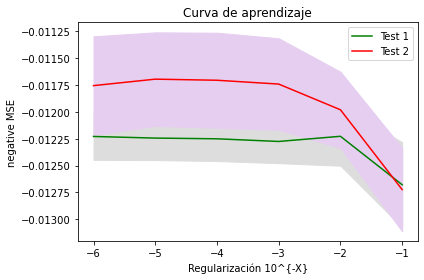

In [17]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test 1")
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="r", label="Test 2")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean2) - np.array(cv_scores_std2)
upper_limit = np.array(cv_scores_mean2) + np.array(cv_scores_std2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#e6cef1")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

* Comentario: Como vemos en la primera curva (Test 1), tiene el comportamiento bastante estable. Por otro lado, en Test 2, aunque es bastante similar, se nota que la influencia del termino de regresion es mayor. Puestos a elegir, el segundo modelo presenta menos error cuadrático medio (MSE) negativo para practicamente todas las variables del conjunto. Y que su mejor valor (el más cercano a cero) es con $\alpha=10^{-5}$, que es ligeramente superior al resto.

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [28]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.1
mlp = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, desPisos_scaled, target_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)

AttributeError: 'numpy.ndarray' object has no attribute 'inverse_transform'

In [20]:
predicts_scaled.shape

(14998,)

In [29]:
target_scaled.shape

(14998, 1)

In [31]:
target_scaled.ravel().shape

(14998,)

In [26]:
scaler_y_np = np.array(scaler_y)

In [27]:
scaler_y_np.shape

()

In [ ]:
-----------------------------------------------------------------

In [ ]:
np.shape(predicts)

In [ ]:
target.to_numpy()

In [ ]:
errors = np.abs(target.to_numpy() - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(target)

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

In [ ]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

In [ ]:
target

In [ ]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(target.to_numpy(), predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(target.to_numpy(), target.to_numpy(), color='k') 

plt.title('Y Vs Y_pred')
plt.show()